In [3]:
## In-Class Assignment 1

import boto3
import pandas as pd

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## 1) Reading the csv file and creating a data frame

house_price = pd.read_csv(file_content_stream)

house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
## 2) Dropping the 'No' column.

house_price = house_price.drop(columns = ['No'])
house_price.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


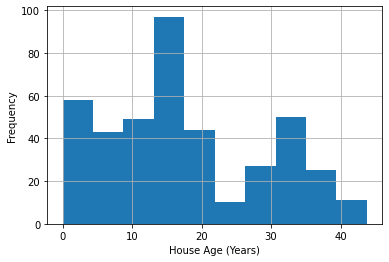

In [10]:
## 3)  Creating a histogram of house_age.

import matplotlib.pyplot as plt

plt.hist(house_price['house_age'])
plt.xlabel('House Age (Years)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## The histogram is a right-skewed, bimodal distribution. We see two peaks: one at around 15 years and the other around 33 years.

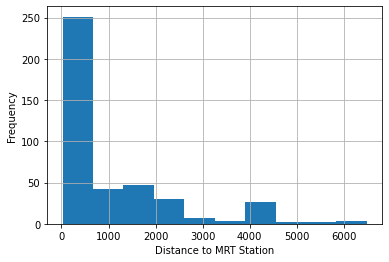

In [11]:
## 4) Creating a histogram of distance_to_nearest_MRT_station.

plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.xlabel('Distance to MRT Station')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## The histogram is a right-skewed distribution with a peak at around 300

In [12]:
## 5) Building a linear regression model in which: house age, distance to the nearest MRT station, number of convenience stores, latitude, and longitude 
## are the input variables, and house price of unit area is the target variable.

from sklearn.linear_model import LinearRegression

## Defining input and output variables
X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

## Building the model
lm_md = LinearRegression().fit(X, Y)
lm_md.coef_

array([-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,  2.37767191e+02,
       -7.80545273e+00])